# $\text{Lab 7: Newton Fractals}$

- Molina Diaz, Sebastian Leonardo: smolinad@unal.edu.co
- Alvarez Velasquez, Luiggi Alexander: luaalvarezve@unal.edu.co

## 1.
Modify *newtonfractalz3_1* from [Github](https://github.com/gjhernandezp/algorithms/blob/master/NewtonFractals/newtonfractalz3_1.ipynb). Add cells to plot and analyze 3 of the fractals shown on [Wikipedia](https://en.wikipedia.org/wiki/Newton_fractal#Generalization_of_Newton_fractals).

In [ ]:
#Using https://github.com/anvetsu/anviz/blob/master/fractals/newton.py

import matplotlib.pyplot as plt
import numpy as np
import math
import functools
import multiprocessing as mp
%matplotlib inline


def rgb2int(rgb):
    red    = rgb[0]
    green  = rgb[1]
    blue   = rgb[2]
    RGBint = (red << 16) + (green << 8) + blue
    return RGBint


def int2rgb(RGBint):
    blue   = RGBint & 255
    green  = (RGBint >> 8) & 255
    red    = (RGBint >> 16) & 255
    return (red, green, blue)


def newton_set_calc_row(y, width, height, function, niter=256, x_off=0, y_off=0, zoom=1):
    """ Calculate one row of the newton set with size width x height """

    row_pixels = np.arange(width, dtype=np.uint32)
    # drawing area
    xa, xb, ya, yb = -2.5, 2.5, -2.5, 2.5

    zy = (y + y_off)*(yb - ya) / (zoom*(height - 1)) + ya   
    
    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed
    a = complex(1, 0)

    for x in range(width): 
        # calculate the initial real and imaginary part of z,
        # based on the pixel location and zoom and position values
        zx = (x + x_off)*(xb - xa) / (zoom*(width - 1)) + xa
        z = complex(zx, zy)
        
        for i in range(niter):
            # complex numerical derivative
            dz = (function(z + complex(h, h)) - function(z)) / complex(h, h)
            if dz == 0:
                break

            znext = z - a*function(z) / dz # Newton iteration
            if abs(znext - z) < eps: # stop when close enough to any root
                break
                
            z = znext

        # Color according to iteration count 
        rgb = (i % 16 * 32, i % 8 * 64, i % 4 * 64)                              
        row_pixels[x] = rgb2int(rgb)


    return y, row_pixels


def newton_set_mp(width, height, function, zoom=1, x_off=0, y_off=0, niter=256):
    """ Newton-raphson fractal set with multiprocessing """
    
    w,h = width, height
    pixels = np.arange(w*h*3, dtype=np.uint32).reshape(h, w, 3)  

    # print('Starting calculation using',width, height,cx,cy)
    pool = mp.Pool(mp.cpu_count())

    newton_partial = functools.partial(newton_set_calc_row, 
                                       width=width,height=height, 
                                       function=function,
                                       niter=niter,
                                       zoom=zoom,
                                       x_off=x_off,
                                       y_off=y_off
                                      )

    for y,row_pixel in pool.map(newton_partial, range(h)):
        for x in range(w):
            pixels[y, x] = np.array(int2rgb(row_pixel[x]))

    return pixels
        
def display(function, width=1024, height=1024, niter=1024, zoom=1, x_off=0, y_off=0):
    """ Display a Newton-Raphson fractal """

    pimg = newton_set_mp(width, height, function, zoom=zoom,x_off=x_off, y_off=y_off, niter=niter) 
    plt.axis('off') 
    plt.imshow(pimg)
    plt.show() 
    
    
def plot(funct):
    x = np.linspace(-2.0,2.0,100)
    fig, ax = plt.subplots()
    ax.plot(x,funct(x))
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.grid(True, which='both')
    plt.xlabel('z')
    plt.ylabel('f(z)')

#Iteration forms
z1 = 10.0 + 0.0j
z2 = -10.0 + 10.0j
z3 = -10.0 - 10.0j
z4 = 0.0 + 0.0j

def newton_iteration(f, df, z):
    string = str(z)
    r = []
    i = []
    for k in range(50):
        dz = df(z)
        z = z - f(z) / dz # Newton iteration
        r.append(np.real(z))
        i.append(np.imag(z))
    plt.title('Newton iteration form ' + string)
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imaginary part')
    plt.show()

- ## [$z^3 - 2z +2$](https://en.wikipedia.org/wiki/File:Newton_z3-2z%2B2.png)

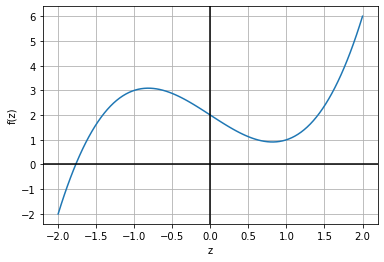

In [ ]:
def f1(z):
    return z*z*z - 2*z + 2

def df1(z):
    return 3*z - 2

plot(f1)

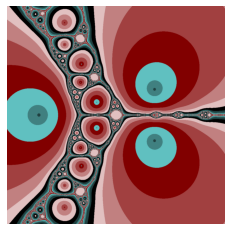

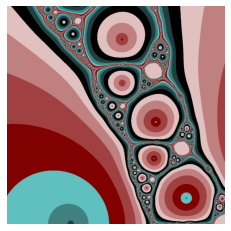

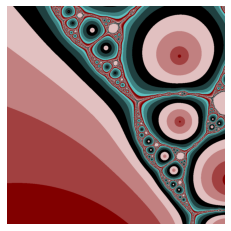

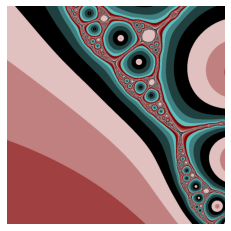

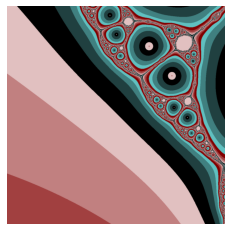

In [ ]:
display(f1)
display(f1, zoom=2)
display(f1, zoom=3)
display(f1, zoom=4)
display(f1, zoom=5)

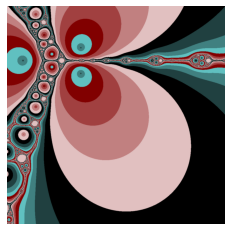

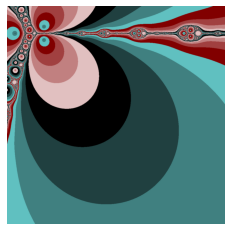

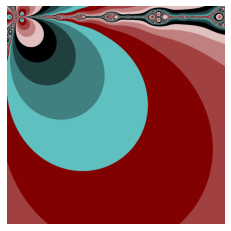

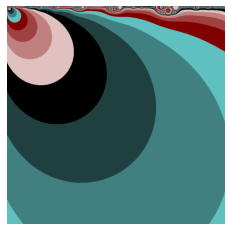

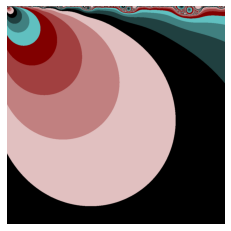

In [ ]:
display(f1, zoom=1/2)
display(f1, zoom=1/4)
display(f1, zoom=1/10)
display(f1, zoom=1/100)
display(f1, zoom=1/1000)

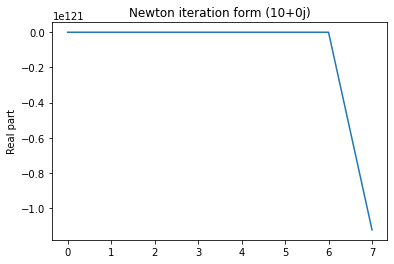

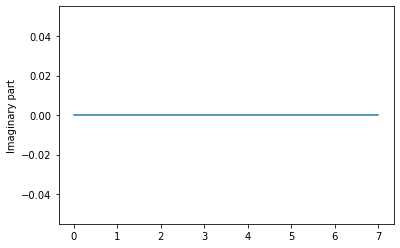

In [ ]:
newton_iteration(f=f1, df=df1, z=z1)

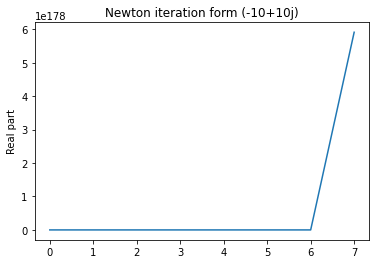

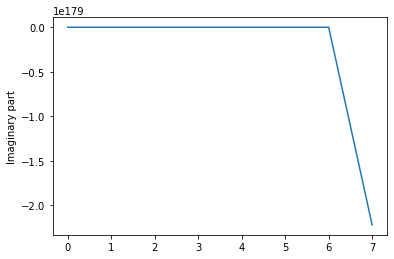

In [ ]:
newton_iteration(f=f1, df=df1, z=z2)

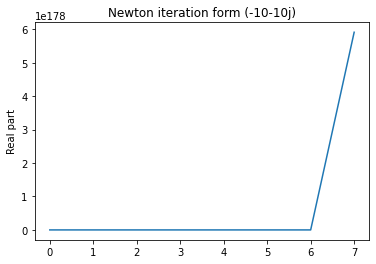

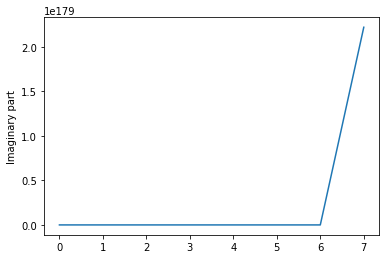

In [ ]:
newton_iteration(f=f1, df=df1, z=z3)

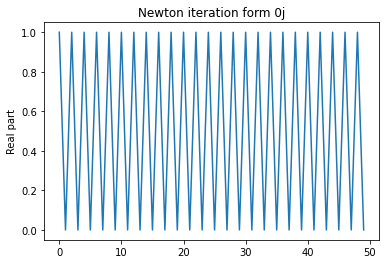

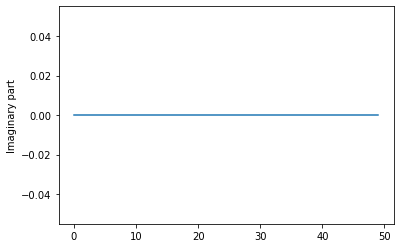

In [ ]:
newton_iteration(f=f1, df=df1, z=z4)

 - ## [$z^6 + z^3 - 1$](https://en.wikipedia.org/wiki/File:Newton_z6_z3.jmb.jpg)

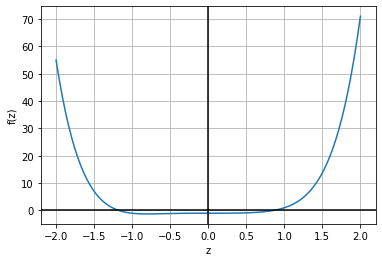

In [ ]:
def f2(z):
    return z*z*z*z*z*z + z*z*z - 1

def df2(z):
    return 6*z*z*z*z*z + 3*z*z

plot(f2)

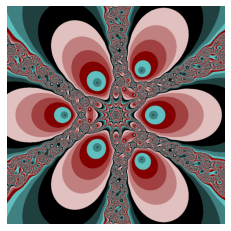

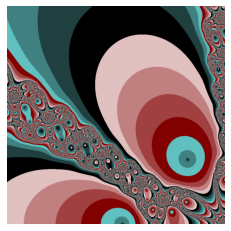

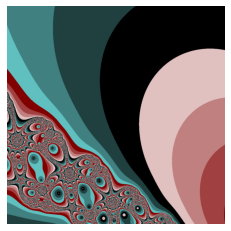

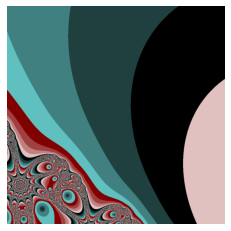

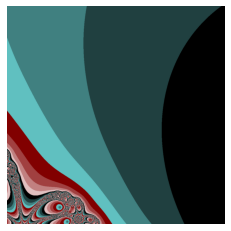

In [ ]:
display(f2)
display(f2, zoom=2)
display(f2, zoom=3)
display(f2, zoom=4)
display(f2, zoom=5)

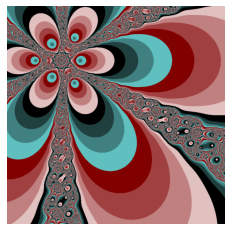

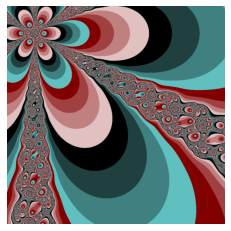

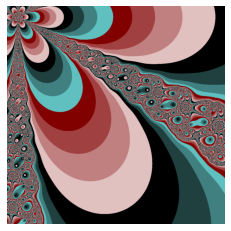

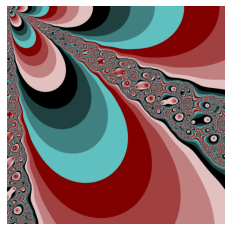

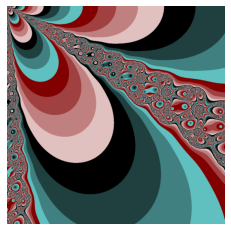

In [ ]:
display(f2, zoom=1/2)
display(f2, zoom=1/4)
display(f2, zoom=1/10)
display(f2, zoom=1/100)
display(f2, zoom=1/1000)

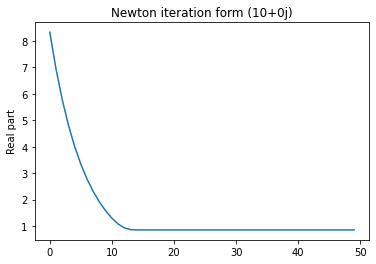

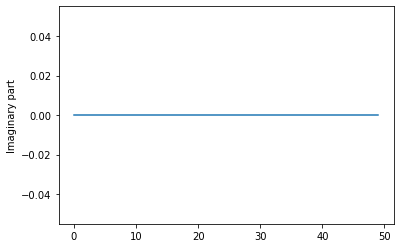

In [ ]:
newton_iteration(f=f2, df=df2, z=z1)

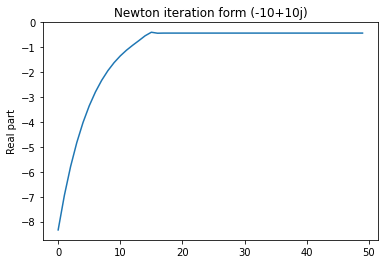

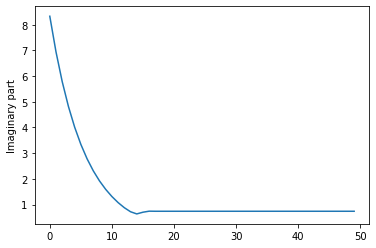

In [ ]:
newton_iteration(f=f2, df=df2, z=z2)

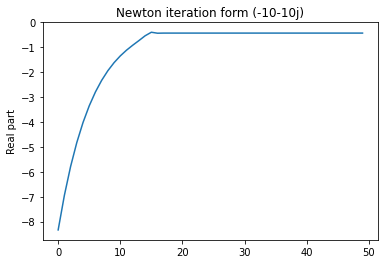

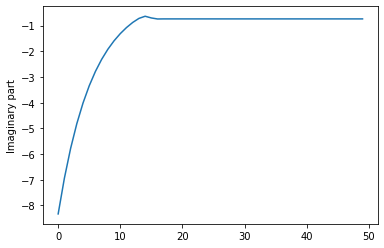

In [ ]:
newton_iteration(f=f2, df=df2, z=z3)

In [ ]:
newton_iteration(f=f2, df=df2, z=z4)

ZeroDivisionError: ignored

- ## [$z^8 + 15z^4 - 16$](https://en.wikipedia.org/wiki/File:Timelapse34.jpg)

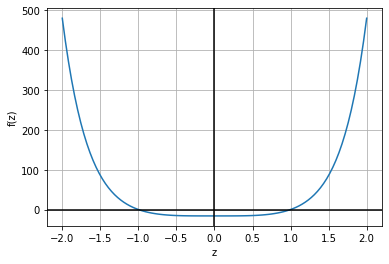

In [ ]:
def f3(z):
    return z*z*z*z*z*z*z*z + 15*z*z*z*z - 16

def df3(z):
    return 8*z*z*z*z*z*z*z + 60*z*z*z

plot(f3)

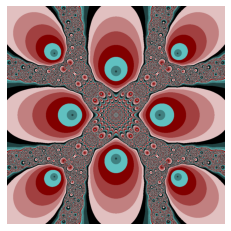

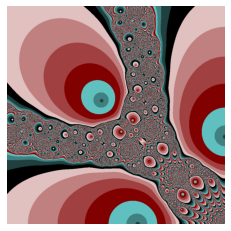

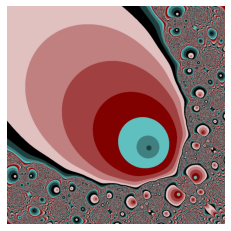

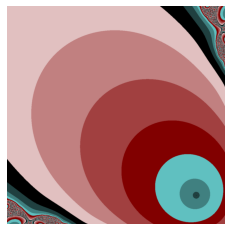

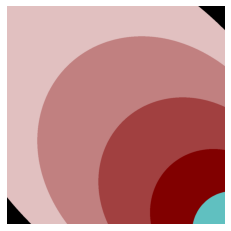

In [ ]:
display(f3)
display(f3, zoom=2)
display(f3, zoom=3)
display(f3, zoom=4)
display(f3, zoom=5)

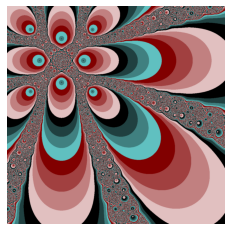

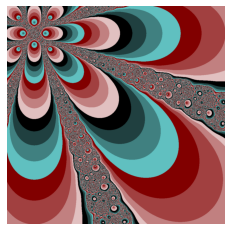

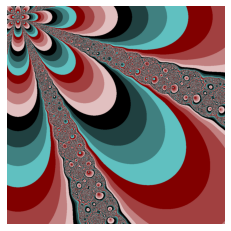

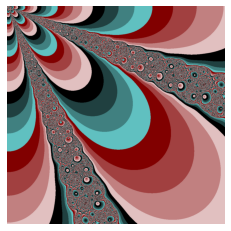

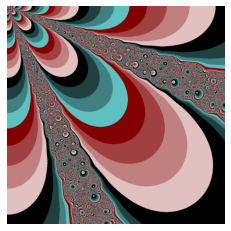

In [ ]:
display(f3, zoom=1/2)
display(f3, zoom=1/4)
display(f3, zoom=1/10)
display(f3, zoom=1/100)
display(f3, zoom=1/1000)

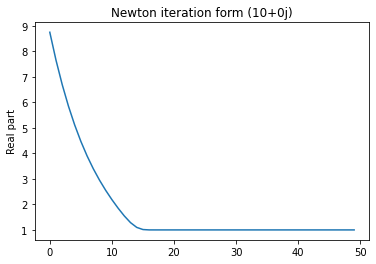

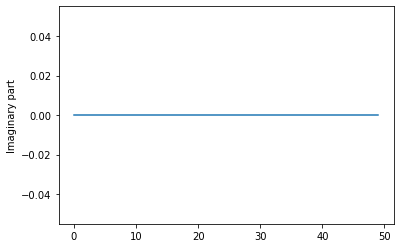

In [ ]:
newton_iteration(f=f3, df=df3, z=z1)

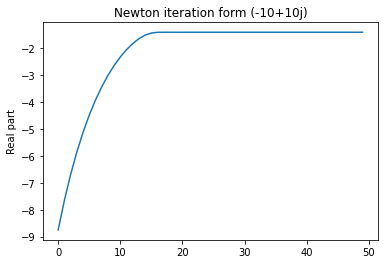

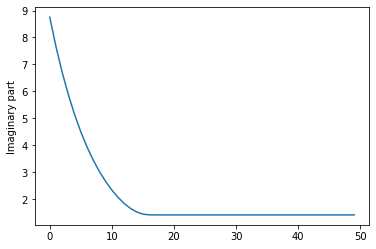

In [ ]:
newton_iteration(f=f3, df=df3, z=z2)

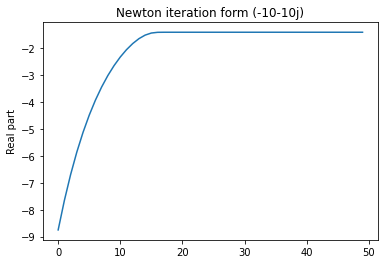

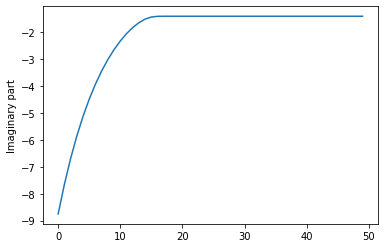

In [ ]:
newton_iteration(f=f3, df=df3, z=z3)

In [ ]:
newton_iteration(f=f3, df=df3, z=z4)

ZeroDivisionError: ignored